# CSCN8000 – Artificial Intelligence Algorithms and Mathematics<br>
## Midterm Part B: California Housing Prices Prediction<br>
## Fatimah Almusawi ,9000400

### Introduction:<br>
In this notebook, we will work with the dataset: California Housing Prices. We will go through all the steps from preprocessing and normalizing the data, to creating a model and training it, with the goal of predicting prices. 


### Data Preprocessing Tasks:<br>


In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# loading the data: housing_dataset.csv
housing_df = pd.read_csv('housing_dataset.csv')
housing_df2 = pd.read_csv('housing_dataset.csv')
# displaying some rows of the dataframe
housing_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


### 2.Detecting and handling outliers for the “median_house_value” field using:<br>


**a. whiskers approach to identify outlier rows.**

In [292]:
#first copy the data to another dataframe
housing_df_copy = housing_df.copy()
housing_df_copy2 = housing_df.copy()
# Calculate Q1, Q3, and IQR
Q1 = housing_df['median_house_value'].quantile(0.25)
Q3 = housing_df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = housing_df[(housing_df['median_house_value'] < lower_bound) | (housing_df['median_house_value'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")

# Optionally, you can remove outliers from the dataset
df_no_outliers = housing_df[(housing_df['median_house_value'] >= lower_bound) & (housing_df['median_house_value'] <= upper_bound)]


Number of outliers detected: 1072


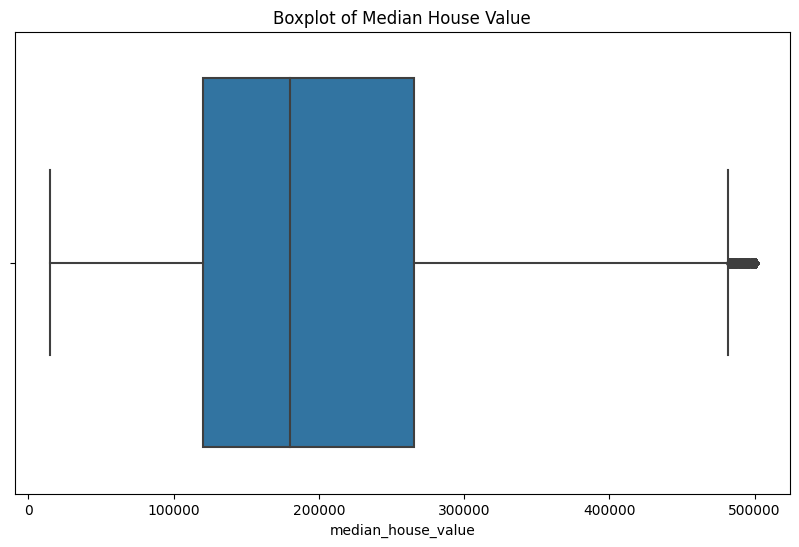

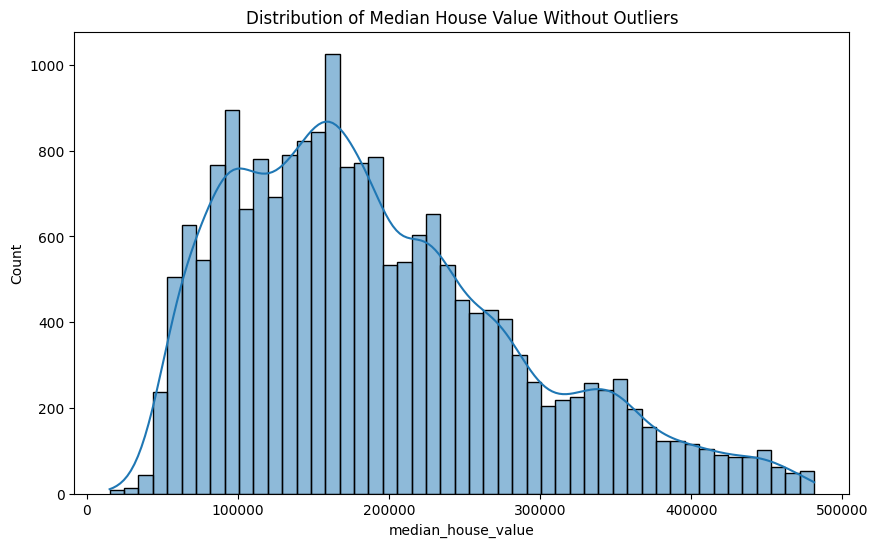

In [293]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_df['median_house_value'])
plt.title('Boxplot of Median House Value')
plt.show()

# Histogram of the data without outliers for comparison
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['median_house_value'], kde=True)
plt.title('Distribution of Median House Value Without Outliers')
plt.show()


as we can see here,before removing outliers there were many points after 500000.the second plot shows the clean data after removing all the outliers.


b.Applying Z-score normalization and choosing appropriate threshold to match the outliers from the whiskers approach:<br>


In [294]:
# Calculate mean and standard deviation
mean_value = housing_df_copy['median_house_value'].mean()
std_dev = housing_df_copy['median_house_value'].std()

# Calculate Z-scores
housing_df_copy['median_house_value_zscore'] = (housing_df_copy['median_house_value'] - mean_value) / std_dev

# first will set the threshold to 3 as a basline and then see
# if need to change(to mach with the outliers from the whiskers approach)
#threshold =3 didnt get any outliers. so i will change the threshold to 2.5
threshold = 2.5
outliers_z = housing_df_copy[(housing_df_copy['median_house_value_zscore'] > threshold) | (housing_df_copy['median_house_value_zscore'] < -threshold)]
print(f"Number of outliers detected using Z-score: {len(outliers_z)}")


Number of outliers detected using Z-score: 1005


### 2 Hadling missing values:<br>
#### a.In numerical features: <br>
##### i: using medain <br>
In my opinion, it is preferable to use the median rather than the mean for filling missing values in numerical features. This is because some features may contain outliers, and filling the missing values with the mean, which is highly influenced by outliers, might result in filled data that is not relevant. However, the median is less affected by outliers.

In [295]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [296]:
# List of numerical features
numerical_features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'median_house_value'
]

# Fill missing values with the median for each numerical feature
for feature in numerical_features:
    median_value = housing_df[feature].median()
    housing_df[feature].fillna(median_value, inplace=True)


Now lets double check if there are any nall values left. i will compare the original df with the one that we filled it with median.

In [297]:
# Count of NaN values in each column before filling missing values
print("Before filling missing values:")
print(housing_df2.isna().sum())

# Count of NaN values in each column after filling missing values
print("\nAfter filling missing values:")
print(housing_df.isna().sum())


Before filling missing values:
longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64

After filling missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity       154
dtype: int64


ok.so as the result, there are zero numbers of Nal values .

##### 2.a.ii:fiiling miised values based on other categorical variables<br>
as we have a categorical feature 'ocean_proximity' and the list of numerical features, we can indeed use ocean_proximity to guide the imputation of missing values in the numerical features. This approach is particularly useful if the missingness of data in our numerical features might be related to their geographical location or proximity to the ocean, which could affect variables like housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and rooms_per_household.

In [298]:
for feature in numerical_features:
    # Calculate the median for the current feature within each 'ocean_proximity' group
    median_values = housing_df_copy2.groupby('ocean_proximity')[feature].median()
    
    # Apply a function to fill missing values with the median based on 'ocean_proximity'
    # Skip rows where 'ocean_proximity' is NaN
    housing_df_copy2[feature] = housing_df_copy2.apply(
        lambda row: median_values[row['ocean_proximity']] if pd.notnull(row['ocean_proximity']) and pd.isnull(row[feature]) else row[feature],
        axis=1
    )


In [299]:
# Count of NaN values in each column before filling missing values
print("Before filling missing values:")
print(housing_df2.isna().sum())

# Count of NaN values in each column after filling missing values
print("\nAfter filling missing values:")
print(housing_df_copy2.isna().sum())


Before filling missing values:
longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64

After filling missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          3
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity       154
dtype: int64


**b.For categorical features:ocean_proximity**
for filling  the missing values in the ocean_proximity as it is the categorical colummn, i will use the Mode. which is the most Frequent Category.

In [300]:
print(housing_df['ocean_proximity'].value_counts(dropna=False))


ocean_proximity
<1H OCEAN     9058
INLAND        6490
NEAR OCEAN    2647
NEAR BAY      2239
NaN            154
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64


In [301]:
# Calculate the mode of the 'ocean_proximity' column
most_frequent_category = housing_df['ocean_proximity'].mode()[0]
print(most_frequent_category)
# Replace missing values with the mode
housing_df['ocean_proximity'].fillna(most_frequent_category, inplace=True)

# Verify that there are no more missing values in 'ocean_proximity'
print(housing_df['ocean_proximity'].isnull().sum())


<1H OCEAN
0


we had 154 null vales and after filling them with"1H OCEAN" now we have zero missing value.<br>


In [302]:
print(housing_df['ocean_proximity'].value_counts(dropna=False))


ocean_proximity
<1H OCEAN     9212
INLAND        6490
NEAR OCEAN    2647
NEAR BAY      2239
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64


### 3.Investigate the existence of errors/inconsistencies in the fields and solve them.<br>
as we sow in above output, the data had many errors . for example there are 4 type of near oacean:("NEAR OCEAN","NEAR BAY","NEAR_bay") need to combine all of them to one category. also "inland " and"INLAND" to one. i am not sure about the  "ISLAND" ,is it by spelling mistake entered as Island or it refer to defrent meaning? so i will keep it as it is



In [303]:
# Mapping variations to unified categories
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].replace({
    'NEAR_bay': 'NEAR OCEAN',
    'NEAR BAY': 'NEAR OCEAN',
    
})
#Convert everything to lowercase (if uniformity in lowercase is preferred)
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].replace({'inland': 'INLAND'})
# Verify the changes
print(housing_df['ocean_proximity'].value_counts())


ocean_proximity
<1H OCEAN     9212
INLAND        6505
NEAR OCEAN    4918
ISLAND           5
Name: count, dtype: int64


here as we can see instead of having 7 catogaries ,now we have only 4. "1H OCEAN" I am not sure if it consider near the ocean or no, so i will keep it as it is

### 4.Normalize numerical features using appropriate method based on feature characteristics.<br>
for normalazing the data there are diffrent method and each one has pros and cons.the data might have outliers and as we just remove outliers for "median_house_value". in this case using method min max will take a very big value for max .also using Z Score normalazation will be sensetive to outliers as it count the mean. <br>
so i will use the method:Robust Scaling, as it take the median of the data and IQR: 

In [304]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

#scaling numerical features
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to your data and transform it
housing_df[numerical_features] = scaler.fit_transform(housing_df[numerical_features])

# Check the transformed data
housing_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,-0.684211,-1.102798,-1.045487,-1.154915,-1.144615,-0.860379,-1.149217,INLAND
1,-117.02,36.40,-0.526316,-0.888365,-0.566065,-0.722222,-0.756923,-0.658749,-1.149217,INLAND
2,-117.86,34.24,1.210526,-0.779971,-0.485199,-0.574786,-0.569231,0.301985,-1.149217,INLAND
3,-123.17,40.31,0.368421,-1.195287,-1.175451,-1.226496,-1.236923,-1.376592,-1.149217,INLAND
4,-118.33,34.15,0.526316,-0.962592,-0.771119,-0.969017,-0.836923,-0.536340,-1.131839,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,0.315789,-0.367599,-0.496751,-0.630342,-0.596923,0.739162,2.220608,<1H OCEAN
20636,-118.69,34.18,-0.947368,-0.559647,-0.857762,-0.802350,-0.895385,2.988847,2.220608,<1H OCEAN
20637,-118.80,34.19,-1.315789,7.920471,5.161011,4.625000,5.360000,2.347516,2.220608,<1H OCEAN
20638,-118.69,34.21,-1.000000,0.904860,-0.075090,0.013889,-0.120000,4.133907,2.220608,<1H OCEAN


now all the features are normalized expet longitude and latitude,i kept them in their original scale thoght might be important for interpretability, especially when geographical information is directly relevant to the analysis or when mapping results.

### 5.Encoding categorical variables <br>
To determine the best encoding method for our data, we should first examine the nature of the data. The ocean_proximity categories ("1H OCEAN", "INLAND", "NEAR OCEAN", "ISLAND") are nominal, meaning they do not possess any inherent order. In such cases, Label Encoding, which assigns a unique integer to each category, is not ideal because it might imply an ordinal relationship that doesn't exist. On the other hand, One-Hot Encoding is a more suitable choice for this data. This method creates a separate binary column for each category, ensuring that the categories are treated as distinct without implying any order or hierarchy among them. One-Hot Encoding is particularly effective for nominal data because it represents each category with equal importance and distinction

In [305]:

#'ocean_proximity' is the column to encode
df_encoded = pd.get_dummies(housing_df, columns=['ocean_proximity'])

# Check the result
print(df_encoded.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.74     39.71           -0.684211    -1.102798       -1.045487  \
1    -117.02     36.40           -0.526316    -0.888365       -0.566065   
2    -117.86     34.24            1.210526    -0.779971       -0.485199   
3    -123.17     40.31            0.368421    -1.195287       -1.175451   
4    -118.33     34.15            0.526316    -0.962592       -0.771119   

   population  households  median_income  median_house_value   
0   -1.154915   -1.144615      -0.860379           -1.149217  \
1   -0.722222   -0.756923      -0.658749           -1.149217   
2   -0.574786   -0.569231       0.301985           -1.149217   
3   -1.226496   -1.236923      -1.376592           -1.149217   
4   -0.969017   -0.836923      -0.536340           -1.131839   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND   
0                      False                    True                   False  \
1   

### 6.Feature Engineering:<br>

Given the dataset's features, a useful new feature could be "rooms_per_household," which represents the average number of rooms per household in a given area. This feature could provide valuable insights into the living conditions and space availability for the residents.

In [306]:
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']

# Check the first few rows to see the new feature
print(housing_df[['rooms_per_household']].head())


   rooms_per_household
0             0.963466
1             1.173653
2             1.370219
3             0.966339
4             1.150156


 The average number of rooms per household might correlate with the housing price, as more spacious homes (with more rooms available per household) could be more desirable and expensive.

## Descriptive Analytics <br>
### Investigate the distribution of housing prices across different ocean proximities in California.

                  count      mean       std       min       25%       50%   
ocean_proximity                                                             
<1H OCEAN        9212.0  0.413812  0.735450 -1.131839 -0.116727  0.234150  \
INLAND           6505.0 -0.386344  0.487505 -1.149217 -0.714956 -0.500955   
ISLAND              5.0  1.389891  0.559733  0.744138  0.830988  1.627931   
NEAR OCEAN       4918.0  0.516836  0.846756 -1.097099 -0.146952  0.357825   

                      75%       max  
ocean_proximity                      
<1H OCEAN        0.751086  2.220608  
INLAND          -0.225117  2.220608  
ISLAND           1.873198  1.873198  
NEAR OCEAN       1.076255  2.220608  


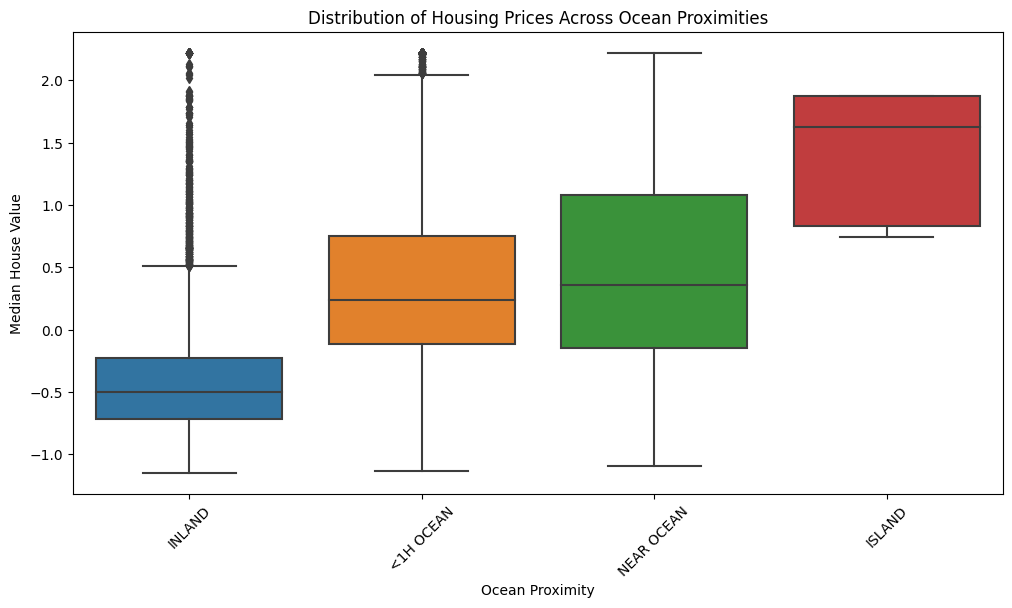

In [307]:

grouped = housing_df.groupby('ocean_proximity')['median_house_value'].describe()
print(grouped)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_df)
plt.title('Distribution of Housing Prices Across Ocean Proximities')
plt.ylabel('Median House Value')
plt.xlabel('Ocean Proximity')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()


### 2.Analyze the relationship between median income and housing prices.<br>
First, get a basic sense of the data with descriptive statistics

In [308]:
print(housing_df[['median_income', 'median_house_value']].describe())


       median_income  median_house_value
count   20640.000000        20640.000000
mean        0.154044            0.186415
std         0.871882            0.800004
min        -1.393161           -1.149217
25%        -0.445795           -0.414105
50%         0.000000            0.000000
75%         0.554205            0.585895
max         5.262123            2.220608


In [309]:
correlation = housing_df['median_income'].corr(housing_df['median_house_value'])
print(f"The Pearson correlation coefficient between median income and housing prices is: {correlation:.2f}")


The Pearson correlation coefficient between median income and housing prices is: 0.69


this result (0.69) between median income and housing prices indicates a strong positive relationship between these two variables. This result suggests that as median income increases, housing prices tend to increase as well

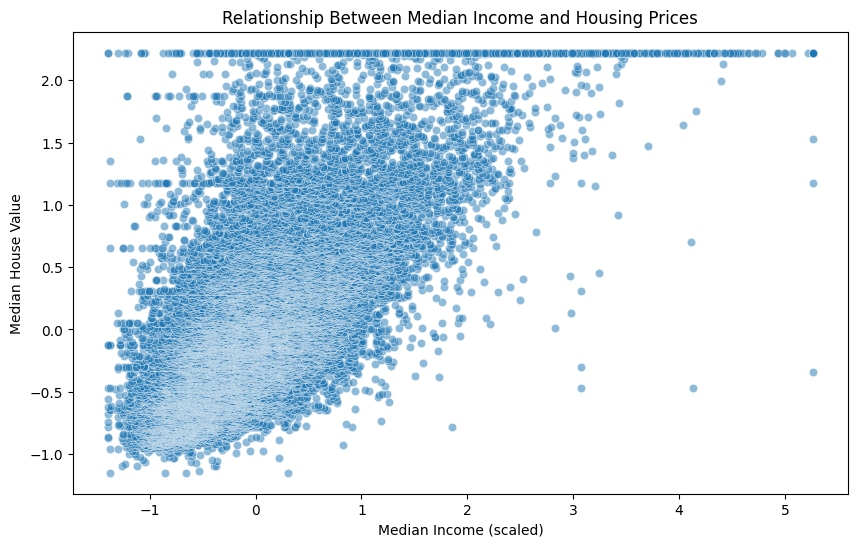

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_df, alpha=0.5)
plt.title('Relationship Between Median Income and Housing Prices')
plt.xlabel('Median Income (scaled)')
plt.ylabel('Median House Value')
plt.show()


we can see from the plot that when the income increase the house value also is increasing

## ML Model Training and Testing<br>
### 1.Split the cleaned data into training and testing sets (e.g., 80% training, 20% testing).


In [333]:
df_encoded.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [322]:
# Separate the features and the target variable
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

X = X.values
y = y.values

In [323]:


# Set a random seed for reproducibility
np.random.seed(42)

# Generate shuffled indices
shuffle_indices = np.random.permutation(np.arange(len(y)))

# Determine the split size (80% training, 20% testing)
split_size = int(len(y) * 0.8)

# Split the indices
train_indices = shuffle_indices[:split_size]
test_indices = shuffle_indices[split_size:]

# Split the data
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


In [327]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16512, 12), (4128, 12), (16512,), (4128,))

In [315]:
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))
print("First row of X_train to verify intercept term:", X_train[0])


X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
First row of X_train to verify intercept term: [-118.32 33.75 0.21052631578947367 0.5119293078055964 -0.10685920577617329
 -0.12606837606837606 -0.07076923076923076 2.6307515777395296 False False
 False True]


### 2.a: Implement the closed-form solution to linear regression:


in the below code,i will change the type of ocean_proximity from true and false to 0 and 1

In [316]:

columns_to_convert = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR OCEAN']

for column in columns_to_convert:
    df_encoded[column] = df_encoded[column].astype(int)

# Now, if you're recreating X_train from the DataFrame:
X_train = df_encoded.drop('median_house_value', axis=1).values  # Ensure this drops or selects the correct columns


In [317]:
print(X_train.dtype)
print(y_train.dtype)

float64
float64


In [329]:
X_train_numeric = X_train.astype(np.float64)


In [330]:
print("X_train_numeric shape:", X_train_numeric.shape)
print("X_train_numeric dtype:", X_train_numeric.dtype)
print("y_train shape:", y_train.shape)
print("y_train dtype:", y_train.dtype)


X_train_numeric shape: (16512, 12)
X_train_numeric dtype: float64
y_train shape: (16512,)
y_train dtype: float64


In [331]:

def compute_weights(X, y):

    XTX_inv = np.linalg.inv(X.T.dot(X))
    theta = XTX_inv.dot(X.T).dot(y)
    return theta



### 2.b: Compute the coefficients for the linear regression model 

In [332]:
theta = compute_weights(X_train_numeric, y_train)



# Print the computed weights
print("Computed weights (coefficients):", theta)


Computed weights (coefficients): [ -0.18250659  -0.17621049   0.13179464  -0.06203628   0.16087493
  -0.24344358   0.17862908   0.5796079  -15.37415485 -15.64865669
 -14.45907803 -15.35399016]


In [335]:
feature_names = [
    'Intercept', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR OCEAN'
]

coefficients = [
    -0.18250659, -0.17621049, 0.13179464, -0.06203628, 0.16087493,
    -0.24344358, 0.17862908, 0.5796079, -15.37415485, -15.64865669,
    -14.45907803, -15.35399016
]

# Assuming the first coefficient is the intercept and is missing from your initial list,
# and the rest of the coefficients align with your features.
# Adjust the 'Intercept' value or remove it based on your model's actual output.

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


Intercept: -0.18250659
longitude: -0.17621049
latitude: 0.13179464
housing_median_age: -0.06203628
total_rooms: 0.16087493
total_bedrooms: -0.24344358
population: 0.17862908
households: 0.5796079
median_income: -15.37415485
ocean_proximity_<1H OCEAN: -15.64865669
ocean_proximity_INLAND: -14.45907803
ocean_proximity_ISLAND: -15.35399016


### 3. Explaining on which feature the model gave higher weight to in the weight vector.

The model assigns the highest positive weight to households (0.5796079), indicating a strong positive influence on the target variable, suggesting that as the number of households increases, so does the median house value. Conversely, median_income and the ocean_proximity categories, especially ocean_proximity_<1H OCEAN (-15.64865669), receive significantly negative weights, suggesting a substantial negative impact on the target variable from these features. However, the large magnitude of these negative weights may warrant a review of data preparation and model assumptions.

### 4.Utilize the learned coefficients to generate predictions on the test dataset split, where:
𝑦̂=𝑋𝜃

In [337]:
# Ensure X_test includes a column of ones if the model includes an intercept
# This step is necessary only if you haven't already added the column of ones to X_test

# Compute predictions
y_pred = X_test.dot(theta)

# y_pred now contains the predicted values for the target variable in the test set


### 5.a: Mean Absolute Error (MAE):

In [338]:
mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.3497041384326238


The Mean Absolute Error (MAE) of 0.35 indicates that, on average, the model's predictions deviate from the actual values by approximately 0.35 units. This relatively low MAE suggests that the model has achieved a good level of accuracy in predicting the target variable across the test dataset.

### 5.b:Mean Squared Error (MSE):

In [339]:
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.23091218315330908


The Mean Squared Error (MSE) of 0.23 signifies that the squared differences between the model's predictions and the actual values average out to 0.23 units. This value, while indicating a generally accurate model, also highlights the presence of some errors in prediction, potentially including the impact of outliers or predictions that are significantly off from the actual values.

### 6.Evaluate the model's performance on the test set using the implemented metrics and report your results.

After applying the implemented evaluation metrics to the test dataset, the results are as follows:<br>

**Mean Absolute Error (MAE):** 0.3497041384326238
**Mean Squared Error (MSE):** 0.23091218315330908
These metrics provide quantitative measures of our model's prediction accuracy on the test set. The MAE of approximately 0.35 suggests that, on average, our model's predictions are about 0.35 units away from the actual values. This indicates a relatively good level of accuracy, as the average error per prediction is low.<br>

The MSE of approximately 0.23 further supports this conclusion, indicating that the squared differences between predicted and actual values are small on average. However, since MSE is more sensitive to outliers than MAE (due to the squaring of errors), this also suggests that our model does not frequently make large errors in its predictions.

Overall, these metrics suggest that the model performs well on the test dataset, with predictions that are generally close to the actual values. The relatively low values of both MAE and MSE indicate a model that could be useful for practical applications, assuming the scale of the target variable and the context of the problem make these levels of error acceptable.

### 7.ِdditional metric to measure of the model's performance:<br>
**Root Mean Squared Error (RMSE)**: RMSE is the square root of the mean squared error (MSE), offering a metric that is in the same unit as the target variable, making it more interpretable. RMSE gives a relatively high weight to large errors, meaning it can provide insight into the variability of the prediction errors.

In [340]:
rmse = np.sqrt(mse)   # I already calculated mse in the previous code:
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.4805332279388274



The Root Mean Squared Error (RMSE) of 0.4805 indicates that the model's predictions are, on average, approximately 0.48 units away from the actual values. This level of RMSE suggests the model has a moderate degree of accuracy, with errors that are relatively low given the context of the data's scale. The metric highlights the model's effectiveness in capturing the target variable's variance, albeit with room for improvement in prediction accuracy.

## Conclusion:<br>
In this notebook, we successfully implemented a linear regression model from scratch, focusing on understanding the underlying mathematics by calculating the model's coefficients using the closed-form solution. Before diving into model building, we conducted thorough data preprocessing, including normalization, filling missing values, and removing outliers to ensure data quality. We evaluated the model's performance on a test dataset using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), which provided insights into the accuracy and reliability of the predictions. The relatively low error metrics indicate that the model performs well, though there's potential for further optimization. This exercise not only reinforced key concepts of linear regression but also highlighted the importance of careful preprocessing and the thoughtful application of evaluation metrics to assess model performance.